In [8]:
import requests
from bs4 import BeautifulSoup

headers = {
'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.5060.134 Safari/537.36 OPR/89.0.4447.83'
}

url = 'https://www.coingecko.com/en/coins/bitcoin/historical_data'

r = requests.get(url)

soup = BeautifulSoup(r.content,'html.parser')

#soup.find_all('div',{'class':'card-block'})


In [57]:
date_tag_list = soup.find('table',{'class':'table table-striped text-sm text-lg-normal'})
date_list = date_tag_list.find_all('th',{'class':'font-semibold text-center'})
#date_list[0].text
date = [date_list[i].text for i in range(len(date_list))]
date

['2022-08-09',
 '2022-08-08',
 '2022-08-07',
 '2022-08-06',
 '2022-08-05',
 '2022-08-04',
 '2022-08-03',
 '2022-08-02',
 '2022-08-01',
 '2022-07-31',
 '2022-07-30',
 '2022-07-29',
 '2022-07-28',
 '2022-07-27',
 '2022-07-26',
 '2022-07-25',
 '2022-07-24',
 '2022-07-23',
 '2022-07-22',
 '2022-07-21',
 '2022-07-20',
 '2022-07-19',
 '2022-07-18',
 '2022-07-17',
 '2022-07-16',
 '2022-07-15',
 '2022-07-14',
 '2022-07-13',
 '2022-07-12',
 '2022-07-11',
 '2022-07-10']

In [13]:
last_four_col = date_tag_list.find_all('td',{'class':'text-center'})
last_four_col[0].text.strip()

'$455,450,642,522'

In [15]:
four_col_list = [last_four_col[i].text.strip() for i in range(len(last_four_col))]


In [16]:
type(four_col_list)

list

In [18]:
#$ sembolü silinmeli ve string ifadeyi int'e dönüştürmeliyiz.
#np array yapalım four_col_list'i
import numpy as np
np_four_col_arr = np.array(four_col_list)
len(np_four_col_arr)

124

In [29]:
def func_clear(arr):
    coin_historical = []
    for i in range(len(arr)):
        if arr[i] == 'N/A':
            coin_historical.append(int(arr[i].replace('N/A','0')))
        else:
            coin_historical.append(int(arr[i].replace('$','').replace(',','').replace('.','')))
    return coin_historical

func_clear(np_four_col_arr)

[455450642522,
 27756736787,
 23824,
 0,
 442979379284,
 14324042469,
 23198,
 23824,
 439414782173,
 14439694271,
 22985,
 23198,
 443821669890,
 27040190910,
 23225,
 22985,
 432420621056,
 23624874220,
 22678,
 23225,
 437035641450,
 41334593234,
 22860,
 22678,
 440954684721,
 35151096517,
 23054,
 22860,
 445958949620,
 44489771147,
 23334,
 23054,
 447051019373,
 31786729326,
 23380,
 23334,
 451726702392,
 62102072347,
 23653,
 23380,
 459609388580,
 41089335196,
 23848,
 23653,
 454806622615,
 55609627981,
 23822,
 23848,
 437193517022,
 54498281944,
 22909,
 23822,
 405692421502,
 53995620035,
 21236,
 22909,
 407480099600,
 42667548129,
 21330,
 21236,
 433819662322,
 33108916659,
 22614,
 21330,
 429803379588,
 42519262113,
 22506,
 22614,
 433485926857,
 40304373301,
 22697,
 22506,
 442379611364,
 63224249258,
 23155,
 22697,
 446130012150,
 40775718994,
 23313,
 23155,
 445889013251,
 57338223362,
 23367,
 23313,
 425756736661,
 58636734705,
 22395,
 23367,
 397660610561,

In [30]:
def get_four_col(arr):
    return [arr[i:i+4] for i in 4*np.arange(0,31)]

get_four_col(func_clear(np_four_col_arr))
        

[[455450642522, 27756736787, 23824, 0],
 [442979379284, 14324042469, 23198, 23824],
 [439414782173, 14439694271, 22985, 23198],
 [443821669890, 27040190910, 23225, 22985],
 [432420621056, 23624874220, 22678, 23225],
 [437035641450, 41334593234, 22860, 22678],
 [440954684721, 35151096517, 23054, 22860],
 [445958949620, 44489771147, 23334, 23054],
 [447051019373, 31786729326, 23380, 23334],
 [451726702392, 62102072347, 23653, 23380],
 [459609388580, 41089335196, 23848, 23653],
 [454806622615, 55609627981, 23822, 23848],
 [437193517022, 54498281944, 22909, 23822],
 [405692421502, 53995620035, 21236, 22909],
 [407480099600, 42667548129, 21330, 21236],
 [433819662322, 33108916659, 22614, 21330],
 [429803379588, 42519262113, 22506, 22614],
 [433485926857, 40304373301, 22697, 22506],
 [442379611364, 63224249258, 23155, 22697],
 [446130012150, 40775718994, 23313, 23155],
 [445889013251, 57338223362, 23367, 23313],
 [425756736661, 58636734705, 22395, 23367],
 [397660610561, 29615794461, 20824, 

In [36]:
market_Cap = np.array(get_four_col(func_clear(np_four_col_arr)))[:,0]
market_Cap

array([455450642522, 442979379284, 439414782173, 443821669890,
       432420621056, 437035641450, 440954684721, 445958949620,
       447051019373, 451726702392, 459609388580, 454806622615,
       437193517022, 405692421502, 407480099600, 433819662322,
       429803379588, 433485926857, 442379611364, 446130012150,
       445889013251, 425756736661, 397660610561, 404705642581,
       397285233066, 393104346703, 385462566549, 370191767291,
       382000290322, 398249545889, 412459838738])

In [37]:
volume = np.array(get_four_col(func_clear(np_four_col_arr)))[:,1]
volume

array([27756736787, 14324042469, 14439694271, 27040190910, 23624874220,
       41334593234, 35151096517, 44489771147, 31786729326, 62102072347,
       41089335196, 55609627981, 54498281944, 53995620035, 42667548129,
       33108916659, 42519262113, 40304373301, 63224249258, 40775718994,
       57338223362, 58636734705, 29615794461, 42051101695, 46542248374,
       28732413537, 28560004361, 22074971578, 21319467249, 25037950754,
       26211587452])

In [38]:
open_prices = np.array(get_four_col(func_clear(np_four_col_arr)))[:,2]
open_prices

array([  23824,   23198,   22985,   23225,   22678,   22860,   23054,
         23334,   23380,   23653,   23848,   23822,   22909,   21236,
         21330,   22614,   22506,   22697,   23155,   23313,   23367,
         22395,   20824,   21193,   20795,   20575,   20225, 1935074,
       1999847,   20860,   21590])

In [39]:
#0, N/A gözüken kapanış fiyatı
close_prices =np.array(get_four_col(func_clear(np_four_col_arr)))[:,3]
close_prices

array([      0,   23824,   23198,   22985,   23225,   22678,   22860,
         23054,   23334,   23380,   23653,   23848,   23822,   22909,
         21236,   21330,   22614,   22506,   22697,   23155,   23313,
         23367,   22395,   20824,   21193,   20795,   20575,   20225,
       1935074, 1999847,   20860])

In [53]:

for i in range(len(open_prices)):
    if len(str(open_prices[i])) > 5:
        print(open_prices[i]/np.power(10,len(str(open_prices[i]))-5))
    else:
        print(open_prices[i])

23824
23198
22985
23225
22678
22860
23054
23334
23380
23653
23848
23822
22909
21236
21330
22614
22506
22697
23155
23313
23367
22395
20824
21193
20795
20575
20225
19350.74
19998.47
20860
21590


In [54]:
def check_arr(arr):
    new_arr = []
    for i in range(len(arr)):
        if len(str(arr[i])) > 5:
            new_arr.append(arr[i]/np.power(10,len(str(arr[i]))-5))
        else:
            new_arr.append(arr[i])
    return new_arr

check_arr(open_prices)

[23824,
 23198,
 22985,
 23225,
 22678,
 22860,
 23054,
 23334,
 23380,
 23653,
 23848,
 23822,
 22909,
 21236,
 21330,
 22614,
 22506,
 22697,
 23155,
 23313,
 23367,
 22395,
 20824,
 21193,
 20795,
 20575,
 20225,
 19350.74,
 19998.47,
 20860,
 21590]

In [61]:
check_arr(close_prices)

[0,
 23824,
 23198,
 22985,
 23225,
 22678,
 22860,
 23054,
 23334,
 23380,
 23653,
 23848,
 23822,
 22909,
 21236,
 21330,
 22614,
 22506,
 22697,
 23155,
 23313,
 23367,
 22395,
 20824,
 21193,
 20795,
 20575,
 20225,
 19350.74,
 19998.47,
 20860]

In [59]:
Open = check_arr(open_prices)
Close =check_arr(close_prices)


In [63]:
veri = [[date[i],market_Cap[i],volume[i],Open[i],Close[i]] for i in range(0,31)]
veri

[['2022-08-09', 455450642522, 27756736787, 23824, 0],
 ['2022-08-08', 442979379284, 14324042469, 23198, 23824],
 ['2022-08-07', 439414782173, 14439694271, 22985, 23198],
 ['2022-08-06', 443821669890, 27040190910, 23225, 22985],
 ['2022-08-05', 432420621056, 23624874220, 22678, 23225],
 ['2022-08-04', 437035641450, 41334593234, 22860, 22678],
 ['2022-08-03', 440954684721, 35151096517, 23054, 22860],
 ['2022-08-02', 445958949620, 44489771147, 23334, 23054],
 ['2022-08-01', 447051019373, 31786729326, 23380, 23334],
 ['2022-07-31', 451726702392, 62102072347, 23653, 23380],
 ['2022-07-30', 459609388580, 41089335196, 23848, 23653],
 ['2022-07-29', 454806622615, 55609627981, 23822, 23848],
 ['2022-07-28', 437193517022, 54498281944, 22909, 23822],
 ['2022-07-27', 405692421502, 53995620035, 21236, 22909],
 ['2022-07-26', 407480099600, 42667548129, 21330, 21236],
 ['2022-07-25', 433819662322, 33108916659, 22614, 21330],
 ['2022-07-24', 429803379588, 42519262113, 22506, 22614],
 ['2022-07-23', 43

In [65]:
import pandas as pd
kolon_isimleri = ['Date','MarketCap','Volume','Open','Close']

df = pd.DataFrame(data=veri,columns=kolon_isimleri)
df

,Date,MarketCap,Volume,Open,Close
0,2022-08-09,455450642522,27756736787,23824.00,0.00
1,2022-08-08,442979379284,14324042469,23198.00,23824.00
2,2022-08-07,439414782173,14439694271,22985.00,23198.00
3,2022-08-06,443821669890,27040190910,23225.00,22985.00
4,2022-08-05,432420621056,23624874220,22678.00,23225.00
5,2022-08-04,437035641450,41334593234,22860.00,22678.00
6,2022-08-03,440954684721,35151096517,23054.00,22860.00
7,2022-08-02,445958949620,44489771147,23334.00,23054.00
8,2022-08-01,447051019373,31786729326,23380.00,23334.00
9,2022-07-31,451726702392,62102072347,23653.00,23380.00


In [67]:
np.mean(df['Open'])

22283.684193548386

In [69]:
np.mean(df['Close'][1:31])

22306.806999999997

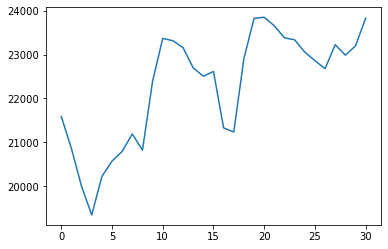

In [79]:
import matplotlib.pyplot as plt

#Open Prices-Açılış fiyatları
plt.plot(range(len(df)),list(reversed(df['Open'])))

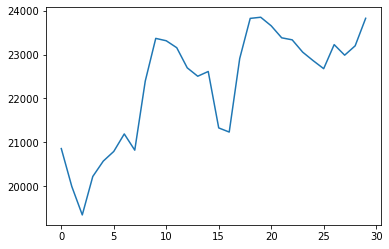

In [84]:
#Close Prices-Kapanış fiyatları

#list(reversed(df['Close'][1:31].values))

plt.plot(range(len(df)-1),list(reversed(df['Close'][1:31].values)))